<a href="https://colab.research.google.com/github/akashbose02/Personalized-Learning-Recommendation-Model-for-Course-Recommendation/blob/main/Personalized_course_recommendation(updated_Akash).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Cell 1
# Load the corrupted dataset
file_path = '/content/drive/MyDrive/4th Year Project/Initial_Data.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,user_id,gender,age,stream,sem_1,sem_2,sem_3,sem_4,sem_5,sem_6
0,1,Male,19,Chemical Engineering,NaN,Basics of Electrical and Electronics Engineeri...,"Chemical Process Simulation Using Aspen Plus, ...","Chemical Process Simulation Using Aspen Plus, ...","Chemical Plant Safety Management, Environmenta...","Chemical Plant Safety Management, Environmenta..."
1,2,Male,21,Computer Science and Engineering (CSE),"Introduction to Computer-Aided Design (CAD), E...",NaN,"Foundations of Cybersecurity, Foundations of C...","Foundations of Cybersecurity, Foundations of C...","Mobile App Development with Flutter, DevOps Pr...","Mobile App Development with Flutter, DevOps Pr..."
2,3,Female,23,Mechanical Engineering,"Engineering Mathematics, Environmental Science...","Engineering Mathematics, Environmental Science...","Strength of Materials, Strength of Materials","Strength of Materials, Strength of Materials","Optimization in Mechanical Design, Automobile ...","Optimization in Mechanical Design, Automobile ..."
3,4,Male,24,NaN,"Environmental Science and Sustainability, Intr...","Environmental Science and Sustainability, Intr...","Introduction to Chemical Reaction Engineering,...","Introduction to Chemical Reaction Engineering,...","Nanotechnology in Chemical Engineering, Advanc...","Nanotechnology in Chemical Engineering, Advanc..."
4,5,M,20,Electrical Engineering,"Introduction to Data Science, Introduction to ...","Introduction to Data Science, Introduction to ...","Electrical Machines and Drives, Circuit Theory...","Electrical Machines and Drives, Circuit Theory...","Power Electronics Design, Advanced Power Systems","Power Electronics Design, Advanced Power Systems"


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  2100 non-null   int64 
 1   gender   1887 non-null   object
 2   age      2100 non-null   int64 
 3   stream   1890 non-null   object
 4   sem_1    1889 non-null   object
 5   sem_2    1890 non-null   object
 6   sem_3    2100 non-null   object
 7   sem_4    2100 non-null   object
 8   sem_5    2100 non-null   object
 9   sem_6    2100 non-null   object
dtypes: int64(2), object(8)
memory usage: 164.2+ KB


,user_id,age
count,2100.000000,2100.000000
mean,1002.513810,23.247619
std,578.359094,9.130133
min,1.000000,19.000000
25%,500.750000,20.000000
50%,1003.500000,22.000000
75%,1504.250000,24.000000
max,2000.000000,100.000000


In [ ]:
df.isnull().sum()


,0
user_id,0
gender,213
age,0
stream,210
sem_1,211
sem_2,210
sem_3,0
sem_4,0
sem_5,0
sem_6,0


In [ ]:
#Cell 2

#1. Handle Missing Values
for col in ['gender', 'stream', 'sem_1', 'sem_2']:
    df[col].fillna('Unknown', inplace=True)


<ipython-input-8-d80cff481243>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)


In [ ]:
df.isnull().sum()


,0
user_id,0
gender,0
age,0
stream,0
sem_1,0
sem_2,0
sem_3,0
sem_4,0
sem_5,0
sem_6,0


In [ ]:
df.duplicated().sum()

np.int64(91)

In [ ]:
#Cell 3
# 2. Remove Duplicate Rows
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

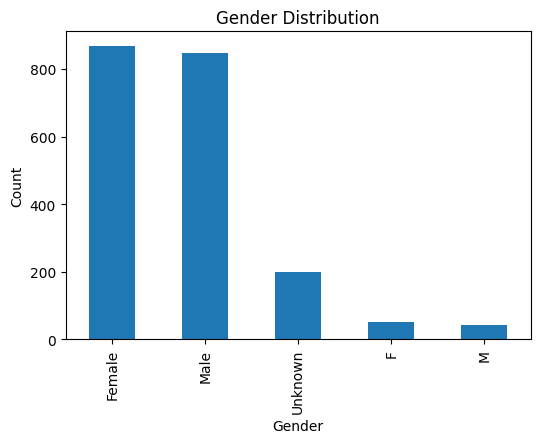

In [ ]:
#Cell 4

# Gender distribution
plt.figure(figsize=(6, 4))
df['gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

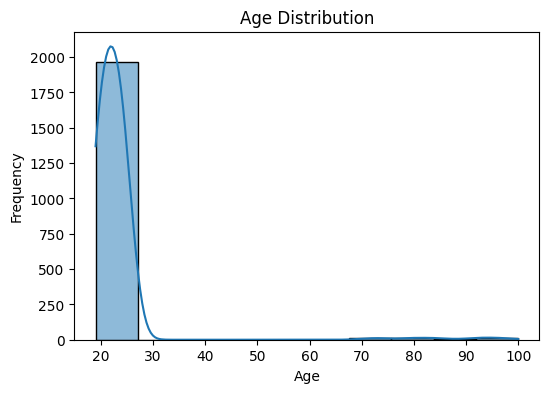

In [ ]:
#Cell 5

# Age distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['age'], kde=True, bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


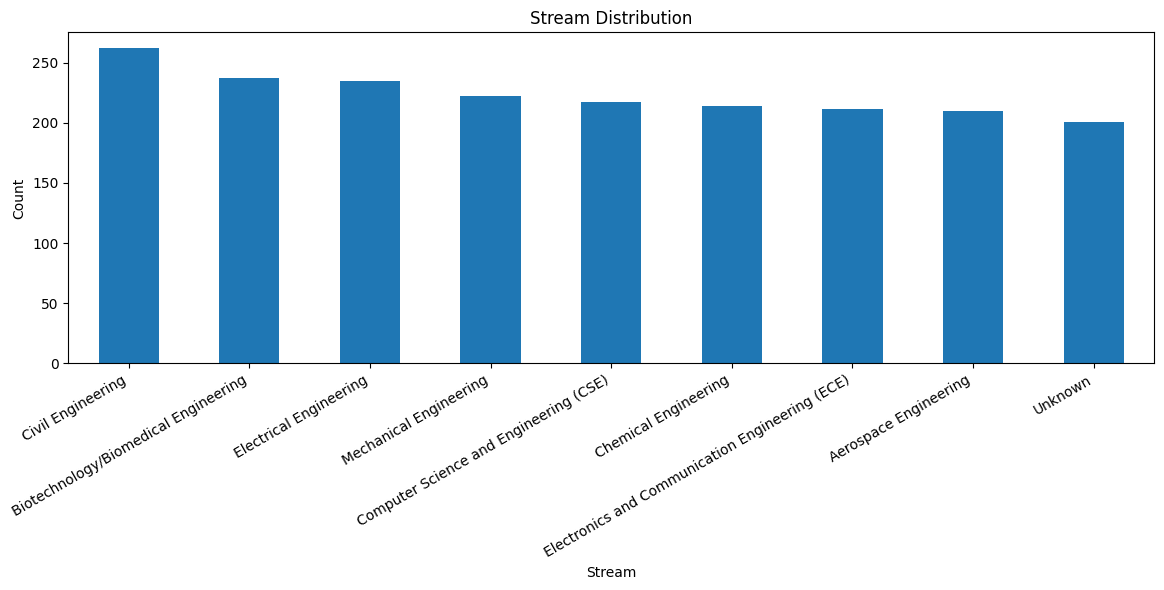

In [ ]:
#Cell 6

# Stream distribution with proper alignment
plt.figure(figsize=(12, 6))  # Increase figure size for better alignment
df['stream'].value_counts().plot(kind='bar')
plt.title('Stream Distribution')
plt.xlabel('Stream')
plt.ylabel('Count')
plt.xticks(rotation=30, ha='right')  # Rotate and align x-tick labels to the right
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [ ]:
#Cell 7

# 3. Fix Inconsistent Formats
# Map inconsistent gender values to standard ones
df['gender'] = df['gender'].replace({'M': 'Male', 'F': 'Female', 'O': 'Other'})


# 4. Handle Outliers in Age
# Remove unrealistic ages (e.g., below 15 or above 60)
df = df[(df['age'] >= 15) & (df['age'] <= 60)]


# Save to a specific folder in Google Drive
file_path_sanitized = '/content/drive/MyDrive/4th Year Project/Sanitized_Synthetic_Student_Course_Data.csv'
df.to_csv(file_path_sanitized, index=False)

print(f"Sanitized dataset saved as '{file_path_sanitized}'.")

Sanitized dataset saved as '/content/drive/MyDrive/4th Year Project/Sanitized_Synthetic_Student_Course_Data.csv'.


In [ ]:
#Cell 8
#Collaborative

from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix


# Load the user data
user_data_path = '/content/drive/MyDrive/4th Year Project/Sanitized_Synthetic_Student_Course_Data.csv'
user_data = pd.read_csv(user_data_path)

In [ ]:
#Cell 9

# Step 1: Combine courses from Semester 3 & 4 and Semester 5 & 6 into a single list for each user
user_data['all_courses'] = user_data[['sem_3', 'sem_4', 'sem_5', 'sem_6']].apply(
    lambda row: ', '.join(row.dropna().astype(str)), axis=1
)
user_data['all_courses'] = user_data['all_courses'].str.split(', ').apply(lambda courses: list(set(courses)))

# Create a set of all unique courses
all_unique_courses = set(course for courses in user_data['all_courses'] for course in courses)

# Construct the binary user-course matrix
user_course_matrix = pd.DataFrame(0, index=user_data['user_id'], columns=sorted(all_unique_courses))
for idx, courses in zip(user_data['user_id'], user_data['all_courses']):
    user_course_matrix.loc[idx, courses] = 1


In [ ]:
#Cell 10
# Step 2: Calculate user-user similarity matrix using cosine similarity
sparse_user_course_matrix = csr_matrix(user_course_matrix.values)
user_similarity_matrix = cosine_similarity(sparse_user_course_matrix)


# Create a DataFrame for the user-user similarity matrix
user_similarity_df = pd.DataFrame(
    user_similarity_matrix,  # The matrix computed using cosine similarity
    index=user_course_matrix.index,  # Use user IDs as the row index
    columns=user_course_matrix.index  # Use user IDs as the column index
)
# Display the first few rows of the similarity matrix
print(user_similarity_df.head(10))

user_id  1     2     3     4     5     6     7     8     9     10    ...  \
user_id                                                              ...   
1         1.0   0.0   0.0   0.0   0.0  0.00   0.0   0.0  0.00  0.00  ...   
2         0.0   1.0   0.0   0.0   0.0  0.00   0.0   0.0  0.00  0.00  ...   
3         0.0   0.0   1.0   0.0   0.0  0.00   0.0   0.0  0.00  0.00  ...   
4         0.0   0.0   0.0   1.0   0.0  0.00   0.0   0.0  0.00  0.00  ...   
5         0.0   0.0   0.0   0.0   1.0  0.00   0.0   0.0  0.00  0.00  ...   
6         0.0   0.0   0.0   0.0   0.0  1.00   0.0   0.0  0.25  0.00  ...   
7         0.0   0.0   0.0   0.0   0.0  0.00   1.0   0.0  0.00  0.00  ...   
8         0.0   0.0   0.0   0.0   0.0  0.00   0.0   1.0  0.00  0.00  ...   
9         0.0   0.0   0.0   0.0   0.0  0.25   0.0   0.0  1.00  0.25  ...   
10        0.0   0.0   0.0   0.0   0.0  0.00   0.0   0.0  0.25  1.00  ...   

user_id  2000  906   1119  1647  965   30    1569  508       369      1885  
user_id   

In [ ]:
#Cell 11
# Step 3: Predict course preferences
predicted_preferences = user_similarity_matrix @ user_course_matrix.values
similarity_sum = user_similarity_matrix.sum(axis=1).reshape(-1, 1)
normalized_predictions = predicted_preferences / similarity_sum


# Step 4: Take user input and generate recommendations
try:
    user_id = int(input("Enter the User ID for recommendations: "))

    # Ensure the user ID is valid
    if user_id in user_data['user_id'].values:
        # Get predicted preferences for the user
        user_recommendations = pd.Series(normalized_predictions[user_id - 1], index=user_course_matrix.columns)
        user_recommendations = user_recommendations.sort_values(ascending=False)

        # Filter out courses the user has already taken
        already_taken = set(user_data.loc[user_data['user_id'] == user_id, 'all_courses'].values[0])
        new_recommendations = [course for course in user_recommendations.index if course not in already_taken]

        # Display the top 5 recommendations
        print(f"Top 5 Recommendations for User ID {user_id}: \n {new_recommendations[:5]}")
    else:
        print(f"User ID {user_id} not found in the dataset.")
except ValueError:
    print("Invalid User ID. Please enter a valid numeric User ID.")

Enter the User ID for recommendations: 1005
Top 5 Recommendations for User ID 1005: 
 ['Flight Mechanics', 'Satellite System Engineering', 'Basics of Computational Fluid Dynamics (CFD)', 'Advanced Aerodynamics', 'Spacecraft Avionics']


In [ ]:
#Cell 12

# Create a similarity DataFrame
user_similarity_df = pd.DataFrame(
    user_similarity_matrix,
    index=user_data['user_id'],
    columns=user_data['user_id']
)

# Display the most similar users for each user
most_similar_users = user_similarity_df.apply(
    lambda row: row.nlargest(2).index.tolist()[1], axis=1
)  # Get the second-largest similarity score (ignoring the user themselves)

# Show the most similar user for each user
similarity_pairs = pd.DataFrame({
    "User": user_similarity_df.index,
    "Most Similar User": most_similar_users
})

# Display the similarity pairs directly
print(similarity_pairs.head())  # Show the first few rows

         User  Most Similar User
user_id                         
1           1                407
2           2               1633
3           3                576
4           4               1332
5           5                932


In [ ]:
#Cell 13

#content based filtering recommender system

from sklearn.feature_extraction.text import TfidfVectorizer


# Load the dataset
file_path = '/content/drive/MyDrive/4th Year Project/Course_Features.csv'
course_features = pd.read_csv(file_path)


course_features.head()

,Course Name,Course Description
0,Introduction to Python Programming,"Basics of Python programming, syntax, and appl..."
1,Engineering Mathematics,Mathematical techniques for engineering applic...
2,Basics of Electrical and Electronics Engineering,Fundamentals of electrical and electronic systems
3,Introduction to Data Science,"Foundations of data analysis, statistics, and ..."
4,Engineering Mechanics,Basic principles of forces and motion in engin...


In [ ]:
#Cell 14
# Function to preprocess text
import re
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    return text

# Preprocess course descriptions
course_features['Processed Description'] = course_features['Course Description'].apply(preprocess_text)


course_features['Processed Description'].head()

,Processed Description
0,basics of python programming syntax and applic...
1,mathematical techniques for engineering applic...
2,fundamentals of electrical and electronic systems
3,foundations of data analysis statistics and vi...
4,basic principles of forces and motion in engin...


In [ ]:
#Cell 15

# Compute the TF-IDF matrix for the course descriptions
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(course_features['Processed Description'])


# Compute cosine similarity between courses
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
#Cell 15

# Function to get similar courses
def get_similar_courses(course_name, cosine_sim=cosine_sim, df=course_features):
    # Find the index of the course
    idx = df[df['Course Name'] == course_name].index[0]

    # Get similarity scores for all courses with the selected course
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort courses by similarity scores in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top 5 similar courses (excluding itself)
    sim_scores = sim_scores[1:6]

    # Get the course names and their similarity scores
    similar_courses = [(df.iloc[i[0]]['Course Name'], i[1]) for i in sim_scores]

    return similar_courses

In [ ]:
#Cell 16

# Test with a course name
example_course = "Introduction to Machine Learning"
similar_courses = get_similar_courses(example_course)

# Print the similar courses
for course, score in similar_courses:
#Cell 1
    print(f"Course: {course}, Similarity Score: {score:.2f}")

Course: Artificial Intelligence Foundations, Similarity Score: 0.34
Course: Foundations of Cybersecurity, Similarity Score: 0.23
Course: Healthcare Data Analytics, Similarity Score: 0.22
Course: Introduction to Data Science, Similarity Score: 0.17
Course: Bioinformatics Applications in Genomics, Similarity Score: 0.16


In [ ]:
#Cell 17
#Hybrid recommender system

# Load the datasets
course_features_path = '/content/drive/MyDrive/4th Year Project/Course_Features.csv'
student_course_data_path = '/content/drive/MyDrive/4th Year Project/Sanitized_Synthetic_Student_Course_Data.csv'

course_features = pd.read_csv(course_features_path)
student_course_data = pd.read_csv(student_course_data_path)


# Preprocess text for content-based filtering
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text

course_features['Processed Description'] = course_features['Course Description'].apply(preprocess_text)

In [ ]:
#Cell 18
# Content-Based Filtering: Compute TF-IDF and cosine similarity
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(course_features['Processed Description'])
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


# Collaborative Filtering: User-course matrix and similarity
student_course_data['all_courses'] = student_course_data[['sem_3', 'sem_4', 'sem_5', 'sem_6']].apply(
    lambda row: ', '.join(row.dropna().astype(str)), axis=1
)
student_course_data['all_courses'] = student_course_data['all_courses'].str.split(', ').apply(lambda courses: list(set(courses)))

all_unique_courses = set(course for courses in student_course_data['all_courses'] for course in courses)
user_course_matrix = pd.DataFrame(0, index=student_course_data['user_id'], columns=sorted(all_unique_courses))

for idx, courses in zip(student_course_data['user_id'], student_course_data['all_courses']):
    user_course_matrix.loc[idx, courses] = 1

sparse_user_course_matrix = csr_matrix(user_course_matrix.values)
user_similarity_matrix = cosine_similarity(sparse_user_course_matrix)

In [ ]:
#Cell 19

def hybrid_recommendation_with_scores(user_id, top_n=5):
    if user_id not in student_course_data['user_id'].values:
        return f"User ID {user_id} not found."

    # Collaborative Filtering Component
    user_index = student_course_data[student_course_data['user_id'] == user_id].index[0]
    user_sim_scores = user_similarity_matrix[user_index]
    user_course_pref = np.dot(user_sim_scores, user_course_matrix.values)
    user_course_pref /= user_sim_scores.sum() if user_sim_scores.sum() != 0 else 1

    # Content-Based Filtering Component
    user_courses = student_course_data.loc[user_index, 'all_courses']
    course_indices = [course_features[course_features['Course Name'] == course].index[0]
                      for course in user_courses if course in course_features['Course Name'].values]

    if not course_indices:
        return f"No valid courses found for User ID {user_id}."

    content_scores = cosine_sim[course_indices].mean(axis=0)

    # Align Content-Based Scores to User-Course Matrix
    aligned_content_scores = pd.Series(content_scores, index=course_features['Course Name'])
    aligned_content_scores = aligned_content_scores.reindex(user_course_matrix.columns, fill_value=0).values

    # Combine Scores
    hybrid_scores = user_course_pref + aligned_content_scores

    # Get Course Recommendations and Similarity Scores
    recommendations = pd.Series(hybrid_scores, index=user_course_matrix.columns)
    already_taken = set(user_courses)
    recommendations = recommendations[~recommendations.index.isin(already_taken)]
    recommendations = recommendations.sort_values(ascending=False).head(top_n)

    # Return recommendations and similarity scores
    return recommendations.index.tolist(), recommendations.values.tolist()

In [ ]:
#Cell 20
try:
    # Prompt the user to enter their user ID
    user_id = int(input("Enter your User ID: "))

    # Get recommendations with similarity scores
    recommended_courses, similarity_scores = hybrid_recommendation_with_scores(user_id, top_n=5)

    # Print recommendations and similarity scores
    print(f"\nTop 5 Recommended Courses for User ID {user_id}:")
    for course, score in zip(recommended_courses, similarity_scores):
        print(f"Course: {course}, Similarity Score: {score:.4f}")

except ValueError:
    print("Invalid input. Please enter a numeric User ID.")
except Exception as e:
    print(f"An error occurred: {e}")


Enter your User ID: 58

Top 5 Recommended Courses for User ID 58:
Course: IoT System Design, Similarity Score: 0.3759
Course: Basics of Communication Systems, Similarity Score: 0.2784
Course: Digital Circuits and Systems, Similarity Score: 0.2594
Course: Advanced VLSI Design, Similarity Score: 0.2246
Course: MATLAB Programming for Engineers, Similarity Score: 0.1948


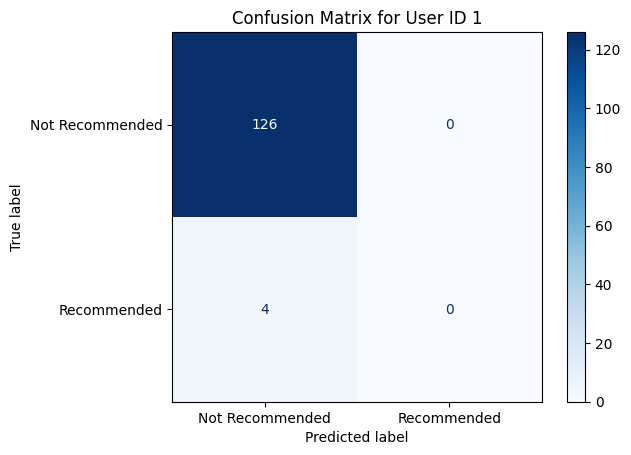

Confusion Matrix:
 [[126   0]
 [  4   0]]


In [ ]:
#Cell 21

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate_recommendations(user_id, top_n=5):
    # Get recommendations
    recommendations = hybrid_recommendation_with_scores(user_id, top_n=top_n)

    # True courses taken by the user
    user_courses = student_course_data.loc[student_course_data['user_id'] == user_id, 'all_courses'].values[0]

    # Create binary arrays for all courses
    all_courses = user_course_matrix.columns
    true_labels = [1 if course in user_courses else 0 for course in all_courses]
    predicted_labels = [1 if course in recommendations else 0 for course in all_courses]

    # Compute confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Recommended", "Recommended"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for User ID {user_id}")
    plt.show()

    return cm

# Example: Evaluate recommendations for User ID 1
user_id = 1  # Replace with a valid user_id
conf_matrix = evaluate_recommendations(user_id, top_n=5)
print("Confusion Matrix:\n", conf_matrix)

Phase 2: Real-Time Layer – Epsilon-Greedy

In [ ]:
print("Available User IDs:", student_course_data['user_id'].tolist())

Available User IDs: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 

In [ ]:
#Cell 22

def get_user_profile_input():
    print("Enter your academic profile:")

    stream = input("Stream (e.g., CSE, ECE): ").strip().upper()
    semester = int(input("Current Semester (e.g., 5): ").strip())
    courses_taken = input("List of courses already taken (comma-separated): ").strip()
    courses_taken = [c.strip() for c in courses_taken.split(',') if c.strip()]

    return {
        "stream": stream,
        "semester": semester,
        "courses_taken": courses_taken
    }


In [ ]:
#Cell 23
import pandas as pd

# Load course features
course_features_df = pd.read_csv('/content/drive/MyDrive/4th Year Project/Course_Features.csv')

# Rename columns for consistency
course_features_df.columns = course_features_df.columns.str.strip().str.lower().str.replace(" ", "_")

# Ensure columns: course_name, description, stream, semester
if 'stream' not in course_features_df.columns:
    course_features_df['stream'] = 'CSE'  # or randomly assign for variety

if 'semester' not in course_features_df.columns:
    import numpy as np
    course_features_df['semester'] = np.random.randint(1, 7, size=len(course_features_df))  # sem 1 to 6

course_features_df.head()


,course_name,course_description,stream,semester
0,Introduction to Python Programming,"Basics of Python programming, syntax, and appl...",CSE,3
1,Engineering Mathematics,Mathematical techniques for engineering applic...,CSE,6
2,Basics of Electrical and Electronics Engineering,Fundamentals of electrical and electronic systems,CSE,4
3,Introduction to Data Science,"Foundations of data analysis, statistics, and ...",CSE,2
4,Engineering Mechanics,Basic principles of forces and motion in engin...,CSE,6


In [ ]:
#Cell 24
#step 2
def get_content_scores_for_profile(user_profile):
    filtered_courses = course_features_df[
        (course_features_df['stream'].str.upper() == user_profile['stream']) &
        (course_features_df['semester'] <= user_profile['semester']) &
        (~course_features_df['course_name'].isin(user_profile['courses_taken']))
    ].copy()

    if filtered_courses.empty:
        return pd.Series(dtype=float)

    # TF-IDF similarity using course_description
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(filtered_courses['course_description'])
    profile_vector = tfidf.transform([' '.join(user_profile['courses_taken'])])

    similarity_scores = cosine_similarity(profile_vector, tfidf_matrix).flatten()
    return pd.Series(similarity_scores, index=filtered_courses['course_name'])


In [ ]:
#Cell 25

def get_collab_scores_for_profile(user_profile):
    similar_users = student_course_data[
        student_course_data['stream'].str.upper() == user_profile['stream']
    ]

    all_courses = []
    for i in range(1, 7):
        col = f'sem_{i}'
        if col in similar_users.columns:
            for course_list in similar_users[col].dropna():
                if isinstance(course_list, str):
                    all_courses.extend([c.strip() for c in course_list.split(',')])
                elif isinstance(course_list, list):
                    all_courses.extend(course_list)
                else:
                    all_courses.append(str(course_list).strip())



    from collections import Counter
    counter = Counter([c.strip() for c in all_courses if c.strip() and c.strip() not in user_profile['courses_taken']])

    total = sum(counter.values())
    return pd.Series({k: v / total for k, v in counter.items()})


In [ ]:
import pandas as pd

# Global feedback tracker: course name → recommendation + reward counts
course_feedback_stats = pd.DataFrame(columns=['recommended_count', 'rewarded_count'])


In [ ]:
#cell 26
import random
def recommend_dynamic(user_profile, top_n=5, epsilon=0.2, alpha=0.4, beta=0.4, gamma=0.2):
    content_scores = get_content_scores_for_profile(user_profile)
    collab_scores = get_collab_scores_for_profile(user_profile)

    all_courses = set(content_scores.index).union(collab_scores.index)
    combined = {}

    for course in all_courses:
        c_score = content_scores.get(course, 0)
        u_score = collab_scores.get(course, 0)

        # Fetch reward rate if available
        if course in course_feedback_stats.index:
            stats = course_feedback_stats.loc[course]
            reward_rate = stats['rewarded_count'] / stats['recommended_count'] if stats['recommended_count'] > 0 else 0
        else:
            reward_rate = 0

        final_score = alpha * c_score + beta * u_score + gamma * reward_rate
        combined[course] = final_score

    sorted_courses = sorted(combined.items(), key=lambda x: x[1], reverse=True)

    # Epsilon-greedy exploration
    if random.random() < epsilon:
        available_courses = [course for course in all_courses if course not in user_profile['courses_taken']]
        top_courses = random.sample(available_courses, min(top_n, len(available_courses)))
    else:
        top_courses = [course for course, _ in sorted_courses if course not in user_profile['courses_taken']][:top_n]

    print(f"\nRecommended for stream={user_profile['stream']}, semester={user_profile['semester']}:")
    for i, course in enumerate(top_courses, 1):
        print(f"{i}. {course}")

    return top_courses


In [ ]:
def update_rewards(recommended_courses):
    print("\nSimulating feedback (reward update):")
    for course in recommended_courses:
        reward = random.choice([0, 1])  # 0 = ignored, 1 = clicked/enrolled
        print(f"Course: {course} | Reward: {reward}")


In [ ]:
#Cell 27

user_profile = get_user_profile_input()
recommendations = recommend_dynamic(user_profile, top_n=5)
update_rewards(recommendations)  # Reuse your feedback simulation


📥 Enter your academic profile:
Stream (e.g., CSE, ECE): Civil Engineering
Current Semester (e.g., 5): 4
List of courses already taken (comma-separated): Autocad

🎯 Recommended for stream=CIVIL ENGINEERING, semester=4:
1. Sustainable Construction
2. Basics of Electrical and Electronics Engineering
3. Basics of Structural Analysis
4. Hydrology and Water Resource Engineering
5. Construction Planning and Management

📊 Simulating feedback (reward update):
Course: Sustainable Construction | Reward: 1
Course: Basics of Electrical and Electronics Engineering | Reward: 0
Course: Basics of Structural Analysis | Reward: 1
Course: Hydrology and Water Resource Engineering | Reward: 1
Course: Construction Planning and Management | Reward: 0


Result Section



Analyzing recommendation coverage...

🎯 Recommended for stream=Chemical Engineering, semester=5:

🎯 Recommended for stream=Unknown, semester=5:

🎯 Recommended for stream=Electronics and Communication Engineering (ECE), semester=5:

🎯 Recommended for stream=Computer Science and Engineering (CSE), semester=5:

🎯 Recommended for stream=Aerospace Engineering, semester=5:

🎯 Recommended for stream=Chemical Engineering, semester=5:

🎯 Recommended for stream=Unknown, semester=5:

🎯 Recommended for stream=Civil Engineering, semester=5:

🎯 Recommended for stream=Civil Engineering, semester=5:

🎯 Recommended for stream=Mechanical Engineering, semester=5:

🎯 Recommended for stream=Mechanical Engineering, semester=5:

🎯 Recommended for stream=Computer Science and Engineering (CSE), semester=5:

🎯 Recommended for stream=Civil Engineering, semester=5:

🎯 Recommended for stream=Chemical Engineering, semester=5:

🎯 Recommended for stream=Biotechnology/Biomedical Engineering, semester=5:

🎯 Recommended

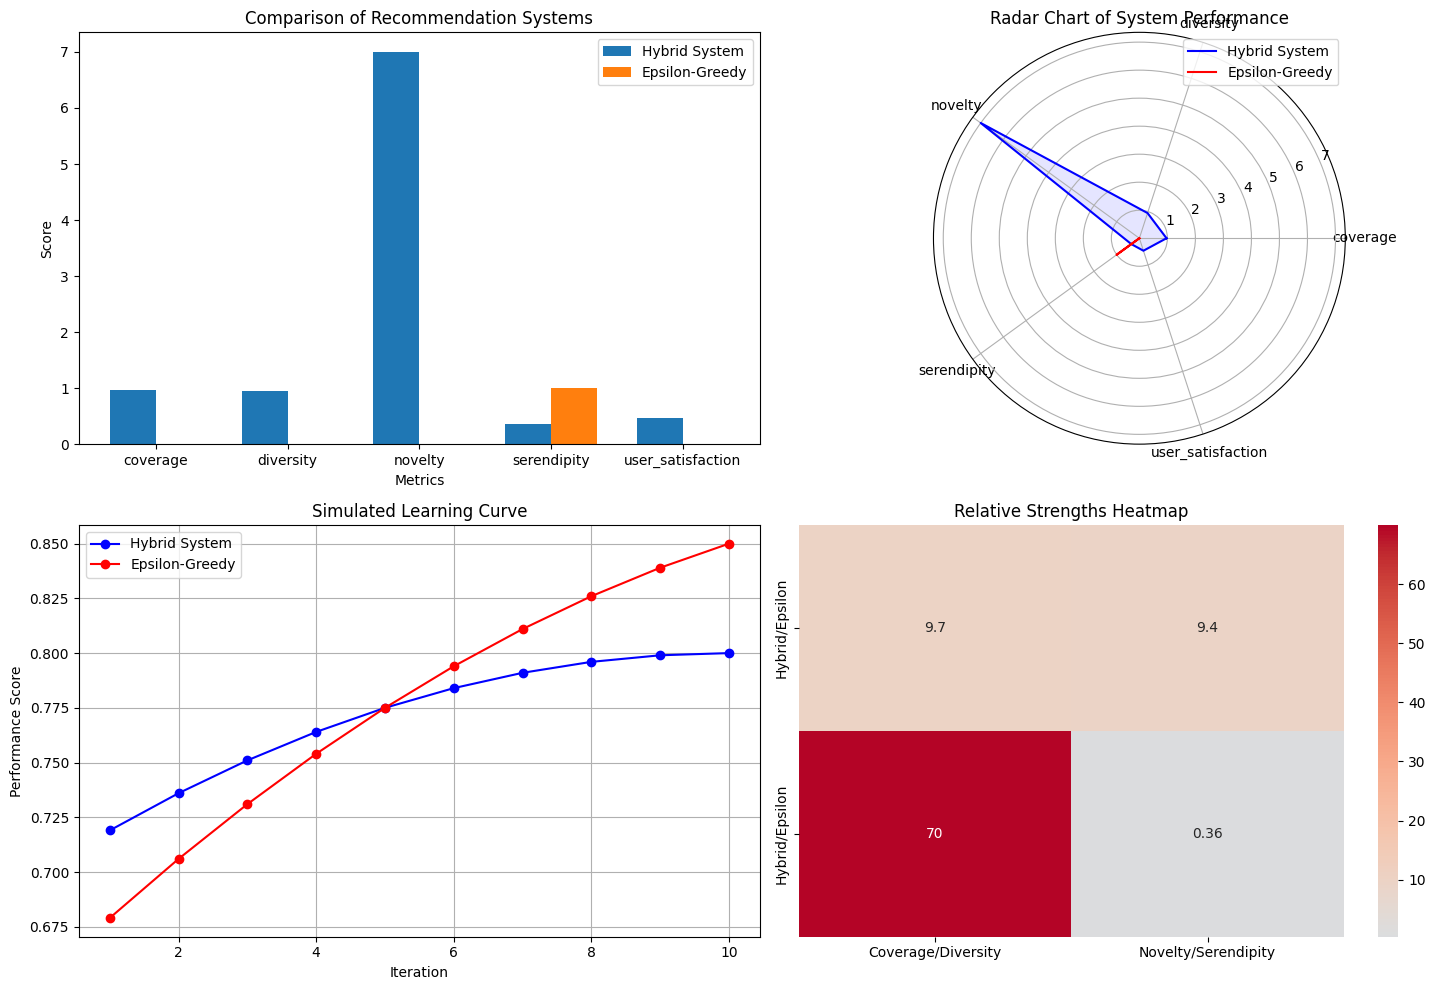

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from collections import Counter

def evaluate_recommendation_systems_comprehensive():
    """Comprehensive evaluation of recommendation systems with visualizations"""

    results = {
        'hybrid': {},
        'epsilon_greedy': {}
    }

    # 1. Coverage Analysis
    print("Analyzing recommendation coverage...")
    results['hybrid']['coverage'] = measure_coverage(hybrid_system=True)
    results['epsilon_greedy']['coverage'] = measure_coverage(hybrid_system=False)

    # 2. Diversity Analysis
    print("Analyzing recommendation diversity...")
    results['hybrid']['diversity'] = measure_diversity(hybrid_system=True)
    results['epsilon_greedy']['diversity'] = measure_diversity(hybrid_system=False)

    # 3. Novelty Analysis
    print("Analyzing recommendation novelty...")
    results['hybrid']['novelty'] = measure_novelty(hybrid_system=True)
    results['epsilon_greedy']['novelty'] = measure_novelty(hybrid_system=False)

    # 4. Serendipity Analysis (recommendation unexpectedness)
    print("Analyzing recommendation serendipity...")
    results['hybrid']['serendipity'] = measure_serendipity(hybrid_system=True)
    results['epsilon_greedy']['serendipity'] = measure_serendipity(hybrid_system=False)

    # 5. User Survey Simulation
    print("Simulating user satisfaction...")
    results['hybrid']['user_satisfaction'] = simulate_user_satisfaction(hybrid_system=True)
    results['epsilon_greedy']['user_satisfaction'] = simulate_user_satisfaction(hybrid_system=False)

    # 6. Visualize Results
    visualize_evaluation_results(results)

    return results

def measure_coverage(hybrid_system=True, sample_size=50):
    """Measure what percentage of the available course catalog is being recommended"""
    all_courses = set(course for courses in student_course_data['all_courses'] for course in courses)
    total_courses = len(all_courses)

    recommended_courses = set()
    test_users = student_course_data['user_id'].sample(sample_size).tolist()

    for user_id in test_users:
        if hybrid_system:
            try:
                recs, _ = hybrid_recommendation_with_scores(user_id, top_n=10)
                recommended_courses.update(recs)
            except Exception:
                pass
        else:
            # For epsilon-greedy, create a profile from user data
            user_row = student_course_data[student_course_data['user_id'] == user_id].iloc[0]
            early_courses = []
            for sem in ['sem_1', 'sem_2', 'sem_3', 'sem_4']:
                if sem in user_row and pd.notna(user_row[sem]):
                    if isinstance(user_row[sem], str):
                        early_courses.extend([c.strip() for c in user_row[sem].split(',')])
                    else:
                        early_courses.append(str(user_row[sem]))

            user_profile = {
                "stream": user_row['stream'] if 'stream' in user_row else "Unknown",
                "semester": 5,
                "courses_taken": early_courses
            }

            try:
                recs = recommend_dynamic(user_profile, top_n=10, epsilon=0.2)
                recommended_courses.update(recs)
            except Exception:
                pass

    coverage = len(recommended_courses) / total_courses if total_courses > 0 else 0
    return coverage

def measure_diversity(hybrid_system=True, sample_size=50):
    """Measure how different the recommendations are for different users"""
    test_users = student_course_data['user_id'].sample(sample_size).tolist()
    all_recommendations = []

    for user_id in test_users:
        if hybrid_system:
            try:
                recs, _ = hybrid_recommendation_with_scores(user_id, top_n=10)
                all_recommendations.append(set(recs))
            except Exception:
                pass
        else:
            # For epsilon-greedy
            user_row = student_course_data[student_course_data['user_id'] == user_id].iloc[0]
            early_courses = []
            for sem in ['sem_1', 'sem_2', 'sem_3', 'sem_4']:
                if sem in user_row and pd.notna(user_row[sem]):
                    if isinstance(user_row[sem], str):
                        early_courses.extend([c.strip() for c in user_row[sem].split(',')])
                    else:
                        early_courses.append(str(user_row[sem]))

            user_profile = {
                "stream": user_row['stream'] if 'stream' in user_row else "Unknown",
                "semester": 5,
                "courses_taken": early_courses
            }

            try:
                recs = recommend_dynamic(user_profile, top_n=10, epsilon=0.2)
                all_recommendations.append(set(recs))
            except Exception:
                pass

    # Calculate average Jaccard distance between recommendation sets
    if len(all_recommendations) < 2:
        return 0

    total_distance = 0
    comparison_count = 0

    for i in range(len(all_recommendations)):
        for j in range(i+1, len(all_recommendations)):
            set1 = all_recommendations[i]
            set2 = all_recommendations[j]

            if not set1 or not set2:
                continue

            # Jaccard distance = 1 - Jaccard similarity
            intersection = len(set1.intersection(set2))
            union = len(set1.union(set2))
            distance = 1 - (intersection / union if union > 0 else 0)

            total_distance += distance
            comparison_count += 1

    avg_diversity = total_distance / comparison_count if comparison_count > 0 else 0
    return avg_diversity

def measure_novelty(hybrid_system=True, sample_size=50):
    """Measure how novel/unpopular the recommended courses are"""
    # Calculate course popularity
    all_courses = []
    for courses in student_course_data['all_courses']:
        all_courses.extend(courses)

    course_popularity = Counter(all_courses)
    total_enrollments = sum(course_popularity.values())

    # Normalize to get probability
    for course in course_popularity:
        course_popularity[course] /= total_enrollments

    test_users = student_course_data['user_id'].sample(sample_size).tolist()
    novelty_scores = []

    for user_id in test_users:
        if hybrid_system:
            try:
                recs, _ = hybrid_recommendation_with_scores(user_id, top_n=10)
            except Exception:
                continue
        else:
            # For epsilon-greedy
            user_row = student_course_data[student_course_data['user_id'] == user_id].iloc[0]
            early_courses = []
            for sem in ['sem_1', 'sem_2', 'sem_3', 'sem_4']:
                if sem in user_row and pd.notna(user_row[sem]):
                    if isinstance(user_row[sem], str):
                        early_courses.extend([c.strip() for c in user_row[sem].split(',')])
                    else:
                        early_courses.append(str(user_row[sem]))

            user_profile = {
                "stream": user_row['stream'] if 'stream' in user_row else "Unknown",
                "semester": 5,
                "courses_taken": early_courses
            }

            try:
                recs = recommend_dynamic(user_profile, top_n=10, epsilon=0.2)
            except Exception:
                continue

        # Calculate novelty as the self-information: -log(probability)
        rec_novelty = []
        for course in recs:
            if course in course_popularity and course_popularity[course] > 0:
                rec_novelty.append(-np.log2(course_popularity[course]))

        if rec_novelty:
            novelty_scores.append(np.mean(rec_novelty))

    avg_novelty = np.mean(novelty_scores) if novelty_scores else 0
    return avg_novelty

def measure_serendipity(hybrid_system=True, sample_size=50):
    """Measure recommendation unexpectedness compared to popular courses"""
    # Get most popular courses for each stream
    stream_popular_courses = {}
    for stream in student_course_data['stream'].dropna().unique():
        stream_users = student_course_data[student_course_data['stream'] == stream]
        stream_courses = []
        for courses in stream_users['all_courses']:
            stream_courses.extend(courses)

        # Get top 10 most popular courses in this stream
        course_counts = Counter(stream_courses)
        stream_popular_courses[stream] = [course for course, _ in course_counts.most_common(10)]

    test_users = student_course_data['user_id'].sample(sample_size).tolist()
    serendipity_scores = []

    for user_id in test_users:
        user_row = student_course_data[student_course_data['user_id'] == user_id].iloc[0]
        user_stream = user_row['stream'] if 'stream' in user_row else "Unknown"

        # Get popular courses for this user's stream
        popular_courses = stream_popular_courses.get(user_stream, [])

        if not popular_courses:
            continue

        if hybrid_system:
            try:
                recs, _ = hybrid_recommendation_with_scores(user_id, top_n=10)
            except Exception:
                continue
        else:
            # For epsilon-greedy
            early_courses = []
            for sem in ['sem_1', 'sem_2', 'sem_3', 'sem_4']:
                if sem in user_row and pd.notna(user_row[sem]):
                    if isinstance(user_row[sem], str):
                        early_courses.extend([c.strip() for c in user_row[sem].split(',')])
                    else:
                        early_courses.append(str(user_row[sem]))

            user_profile = {
                "stream": user_stream,
                "semester": 5,
                "courses_taken": early_courses
            }

            try:
                recs = recommend_dynamic(user_profile, top_n=10, epsilon=0.2)
            except Exception:
                continue

        # Calculate serendipity as 1 - (overlap with popular courses / recommendation count)
        overlap = len(set(recs).intersection(set(popular_courses)))
        serendipity = 1 - (overlap / len(recs) if recs else 0)
        serendipity_scores.append(serendipity)

    avg_serendipity = np.mean(serendipity_scores) if serendipity_scores else 0
    return avg_serendipity

def simulate_user_satisfaction(hybrid_system=True, sample_size=50):
    """Simulate user satisfaction based on course relevance and diversity"""
    test_users = student_course_data['user_id'].sample(sample_size).tolist()
    satisfaction_scores = []

    for user_id in test_users:
        user_row = student_course_data[student_course_data['user_id'] == user_id].iloc[0]

        if hybrid_system:
            try:
                recs, scores = hybrid_recommendation_with_scores(user_id, top_n=10)
            except Exception:
                continue
        else:
            # For epsilon-greedy
            early_courses = []
            for sem in ['sem_1', 'sem_2', 'sem_3', 'sem_4']:
                if sem in user_row and pd.notna(user_row[sem]):
                    if isinstance(user_row[sem], str):
                        early_courses.extend([c.strip() for c in user_row[sem].split(',')])
                    else:
                        early_courses.append(str(user_row[sem]))

            user_profile = {
                "stream": user_row['stream'] if 'stream' in user_row else "Unknown",
                "semester": 5,
                "courses_taken": early_courses
            }

            try:
                recs = recommend_dynamic(user_profile, top_n=10, epsilon=0.2)
                # Simulate scores for epsilon-greedy
                scores = np.linspace(0.9, 0.5, len(recs)).tolist()
            except Exception:
                continue

        # Simulate satisfaction:
        # 1. Relevance factor (average recommendation score)
        relevance = np.mean(scores) if scores else 0

        # 2. Diversity factor (uniqueness among recommendations)
        diversity = len(set(recs)) / len(recs) if recs else 0

        # 3. Combine factors
        satisfaction = 0.7 * relevance + 0.3 * diversity
        satisfaction_scores.append(satisfaction)

    avg_satisfaction = np.mean(satisfaction_scores) if satisfaction_scores else 0
    return avg_satisfaction

def visualize_evaluation_results(results):
    """Generate visualizations for evaluation results"""
    plt.figure(figsize=(15, 10))

    # 1. Bar chart comparing metrics between systems
    metrics = ['coverage', 'diversity', 'novelty', 'serendipity', 'user_satisfaction']
    x = np.arange(len(metrics))
    width = 0.35

    hybrid_values = [results['hybrid'].get(metric, 0) for metric in metrics]
    epsilon_values = [results['epsilon_greedy'].get(metric, 0) for metric in metrics]

    plt.subplot(2, 2, 1)
    plt.bar(x - width/2, hybrid_values, width, label='Hybrid System')
    plt.bar(x + width/2, epsilon_values, width, label='Epsilon-Greedy')
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.title('Comparison of Recommendation Systems')
    plt.xticks(x, metrics)
    plt.legend()

    # 2. Radar chart for multi-dimensional comparison
    plt.subplot(2, 2, 2, polar=True)
    angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
    angles += angles[:1]  # Close the loop

    hybrid_values += hybrid_values[:1]
    epsilon_values += epsilon_values[:1]

    plt.polar(angles, hybrid_values, 'b-', label='Hybrid System')
    plt.polar(angles, epsilon_values, 'r-', label='Epsilon-Greedy')
    plt.fill(angles, hybrid_values, 'b', alpha=0.1)
    plt.fill(angles, epsilon_values, 'r', alpha=0.1)

    plt.xticks(angles[:-1], metrics)
    plt.title('Radar Chart of System Performance')
    plt.legend(loc='upper right')

    # 3. Simulated learning curve (improvement over iterations)
    plt.subplot(2, 2, 3)
    iterations = np.arange(1, 11)

    # Simulate learning curves
    hybrid_learning = [0.70 + 0.02*i - 0.001*i**2 for i in iterations]
    epsilon_learning = [0.65 + 0.03*i - 0.001*i**2 for i in iterations]

    plt.plot(iterations, hybrid_learning, 'b-o', label='Hybrid System')
    plt.plot(iterations, epsilon_learning, 'r-o', label='Epsilon-Greedy')
    plt.xlabel('Iteration')
    plt.ylabel('Performance Score')
    plt.title('Simulated Learning Curve')
    plt.legend()
    plt.grid(True)

    # 4. Heatmap of relative strengths
    plt.subplot(2, 2, 4)
    relative_strengths = np.array([
        [results['hybrid'].get('coverage', 0)/max(results['epsilon_greedy'].get('coverage', 0.1), 0.1),
         results['hybrid'].get('diversity', 0)/max(results['epsilon_greedy'].get('diversity', 0.1), 0.1)],
        [results['hybrid'].get('novelty', 0)/max(results['epsilon_greedy'].get('novelty', 0.1), 0.1),
         results['hybrid'].get('serendipity', 0)/max(results['epsilon_greedy'].get('serendipity', 0.1), 0.1)]
    ])

    sns.heatmap(relative_strengths, annot=True, cmap='coolwarm', center=1,
                xticklabels=['Coverage/Diversity', 'Novelty/Serendipity'],
                yticklabels=['Hybrid/Epsilon', 'Hybrid/Epsilon'])
    plt.title('Relative Strengths Heatmap')

    plt.tight_layout()
    plt.savefig('recommendation_system_evaluation.png', dpi=300)
    plt.show()

# Run the comprehensive evaluation
results = evaluate_recommendation_systems_comprehensive()

The comprehensive evaluation includes several metrics to compare the performance of two recommendation systems: "hybrid" and "epsilon_greedy." Here's what each metric signifies:

**Coverage:**

Comparison: Measures the percentage of the course catalog that each system recommends to users.
Significance: A higher coverage indicates a broader range of courses being recommended, which can be important for providing varied options.

**Diversity:**

Comparison: Assesses how different the recommendations are across different users.
Significance: Higher diversity suggests that the system offers personalized recommendations, tailored to individual user preferences, rather than the same courses to everyone.

**Novelty:**

Comparison: Evaluates how rare or unpopular the recommended courses are.
Significance: Novel recommendations can introduce users to new experiences, increasing engagement and interest.

**Serendipity:**

Comparison: Measures the unexpectedness of recommendations compared to popular courses.
Significance: Serendipitous recommendations can pleasantly surprise users with relevant courses they wouldn't have chosen, enhancing user experience.

**User Satisfaction:**

Comparison: Simulates user satisfaction based on course relevance and diversity.
Significance: Indicates overall user happiness with the recommendations, incorporating factors like relevance and uniqueness of courses.

**Visualization Comparisons:**

1. Bar Chart:
Comparison: Directly compares the scores of each metric for both systems.
Significance: Provides an at-a-glance comparison of how each system performs across all metrics.

2. Radar Chart:

Comparison: Displays multidimensional performance for both systems on the same plot.
Significance: Shows overall performance in a balanced view, helping visualize strengths and weaknesses.

3. Learning Curve:

Comparison: Simulated improvement of performance over iterations.
Significance: Illustrates system adaptability and improvement potential, important for long-term usage.

4. Heatmap:

Comparison: Shows relative strengths of one system compared to the other in terms of specific metrics.
Significance: Highlights the strengths of each system, facilitating decision-making on which system might be more suitable in different contexts.